In [2]:
from os import listdir
from os.path import isfile, join
import sys
sys.path.append("/Users/andyreagan/tools/python")
from kitchentable.dogtoys import *
from json import loads
from re import findall,UNICODE
from labMTsimple.labMTsimple.speedy import LabMT
my_LabMT = LabMT()
from labMTsimple.labMTsimple.storyLab import *
import numpy as np

from database.bookclass import Book_raw_data

import os
sys.path.append('/Users/andyreagan/projects/2014/09-books/database')
os.environ.setdefault('DJANGO_SETTINGS_MODULE','gutenbergdb.settings')
import django
django.setup()

from library.models import *

loading LabMT with stopVal=0.0, for 10222 words


In [3]:
# import pickle
# from rdflib import Graph
# import rdflib

# import hashlib

In [98]:
# all our essentials
from matplotlib import rc,rcParams,patches
# rc('font', family='sans-serif') 
# rc('font', serif='Helvetica Neue')
# rc('text', usetex='false') 

rc('font', family='serif')
rc('font', family='cmr10')
rc('text', usetex='true') 

rcParams.update({'font.size': 14})
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
Book.objects.all()

[<Book: The Declaration of Independence of the United States of America>, <Book: The United States Bill of Rights
The Ten Original Amendments to the Constitution of the United States>, <Book: John F. Kennedy's Inaugural Address>, <Book: Lincoln's Gettysburg Address
Given November 19, 1863 on the battlefield near Gettysburg, Pennsylvania, USA>, <Book: The United States Constitution>, <Book: Give Me Liberty or Give Me Death>, <Book: The Mayflower Compact>, <Book: Abraham Lincoln's Second Inaugural Address>, <Book: Abraham Lincoln's First Inaugural Address>, <Book: The King James Version of the Bible>, <Book: Alice's Adventures in Wonderland>, <Book: Through the Looking-Glass>, <Book: The Hunting of the Snark: An Agony in Eight Fits>, <Book: The 1990 CIA World Factbook>, <Book: Moby Dick>, <Book: Peter Pan>, <Book: The Book of Mormon
An Account Written by the Hand of Mormon Upon Plates Taken from the Plates of Nephi>, <Book: The Federalist Papers>, <Book: The Song of Hiawatha>, <Book: Par

In [13]:
len(Book.objects.all())

51249

## Downloads

In [7]:
all_downloads = np.array([b.downloads for b in Book.objects.all()])

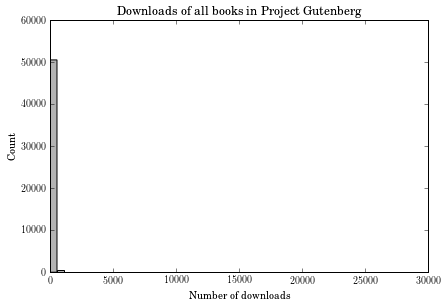

In [14]:
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([.2,.2,.7,.7])
a = ax.hist(all_downloads,bins=50,color=".7")
ax.set_xlabel("Number of downloads")
ax.set_ylabel("Count")
ax.set_title("Downloads of all books in Project Gutenberg")
mysavefig('downloads-counts-all.pdf',date=True,folder="media/figures/gutenberg-details",openfig=False)


3544


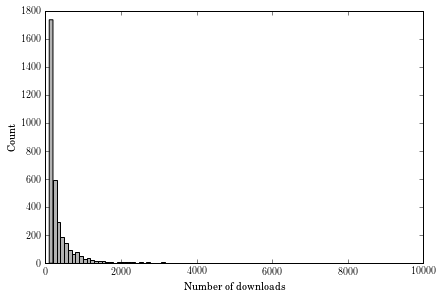

In [15]:
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([.2,.2,.7,.7])
a = ax.hist(all_downloads[(all_downloads>100) & (all_downloads<10000)],bins=100,color=".7")
ax.set_xlabel("Number of downloads")
ax.set_ylabel("Count")
# ax.set_title(r"Downloads for books with $\gt$ 100 \& $\lt$ 10000 in Project Gutenberg")
print(len(all_downloads[(all_downloads>100) & (all_downloads<10000)]))

mysavefig('downloads-counts-subset.pdf',date=True,folder="media/figures/gutenberg-details",openfig=False)

In [16]:
sorted_downloads = sorted(all_downloads,reverse=True)

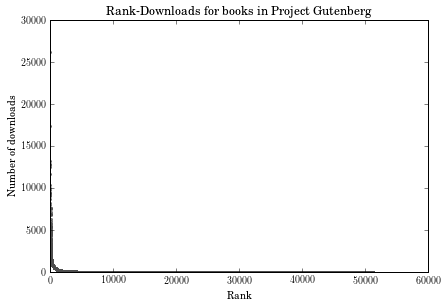

In [17]:
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([.2,.2,.7,.7])
a = ax.plot(range(len(sorted_downloads)),sorted_downloads,".",markerfacecolor=".3",markeredgewidth=0.0,alpha=0.8)
ax.set_xlabel("Rank")
ax.set_ylabel("Number of downloads")
ax.set_title("Rank-Downloads for books in Project Gutenberg")

mysavefig('downloads-counts-rank.pdf',date=True,folder="media/figures/gutenberg-details",openfig=False)

/Users/andyreagan/projects/2014/09-books/pyvenv/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()

  app.launch_new_instance()



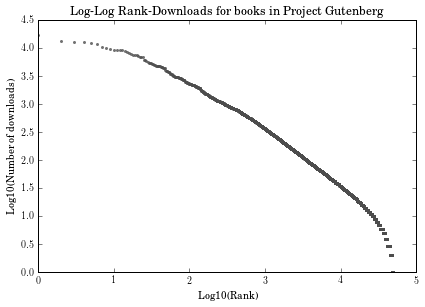

In [18]:
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([.2,.2,.7,.7])
a = ax.plot(np.log10(range(len(sorted_downloads))),np.log10(sorted_downloads),".",markerfacecolor=".3",markeredgewidth=0.0,alpha=0.8)
ax.set_xlabel("Log10(Rank)")
ax.set_ylabel("Log10(Number of downloads)")
ax.set_title("Log-Log Rank-Downloads for books in Project Gutenberg")
mysavefig('downloads-counts-rank-loglog.pdf',date=True,folder="media/figures/gutenberg-details",openfig=False)

## Book length

First, we'll exclude books that we don't have, and those of 0 length

In [19]:
len(Book.objects.filter(exclude=False,length__gt=0))

49880

In [20]:
all_lengths = np.array([b.length for b in Book.objects.filter(exclude=False,length__gt=0)])

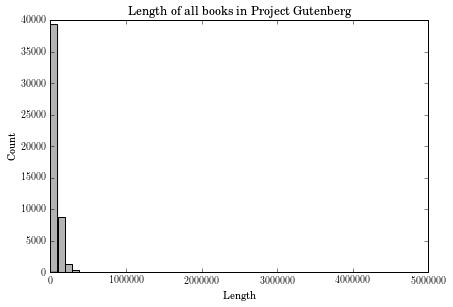

In [21]:
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([.2,.2,.7,.7])
a = ax.hist(all_lengths,bins=50,color=".7")
ax.set_xlabel("Length")
ax.set_ylabel("Count")
ax.set_title("Length of all books in Project Gutenberg")

mysavefig('length-all.pdf',date=True,folder="media/figures/gutenberg-details",openfig=False)

In [22]:
sorted_lengths = sorted(all_lengths,reverse=False)

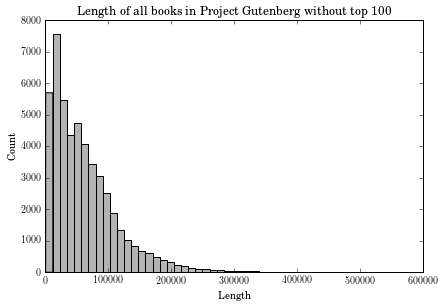

In [23]:
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([.2,.2,.7,.7])
a = ax.hist(sorted_lengths[:-100],bins=50,color=".7")
ax.set_xlabel("Length")
ax.set_ylabel("Count")
ax.set_title("Length of all books in Project Gutenberg without top 100")


mysavefig('length-without-top100.pdf',date=True,folder="media/figures/gutenberg-details",openfig=False)

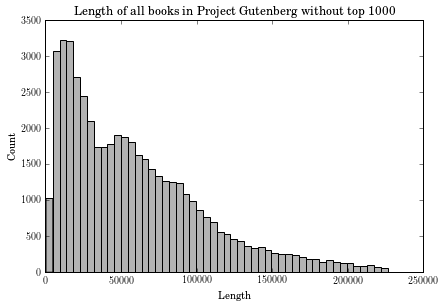

In [24]:
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([.2,.2,.7,.7])
a = ax.hist(sorted_lengths[:-1000],bins=50,color=".7")
ax.set_xlabel("Length")
ax.set_ylabel("Count")
ax.set_title("Length of all books in Project Gutenberg without top 1000")


mysavefig('length-without-top1000.pdf',date=True,folder="media/figures/gutenberg-details",openfig=False)

/Users/andyreagan/projects/2014/09-books/pyvenv/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()

  app.launch_new_instance()



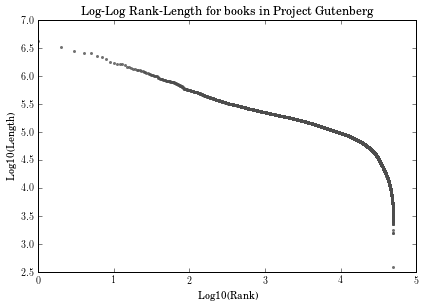

In [25]:
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([.2,.2,.7,.7])
a = ax.plot(np.log10(range(len(sorted_lengths))),np.log10(np.flipud(sorted_lengths)),".",markerfacecolor=".3",markeredgewidth=0.0,alpha=0.8)
ax.set_xlabel("Log10(Rank)")
ax.set_ylabel("Log10(Length)")
ax.set_title("Log-Log Rank-Length for books in Project Gutenberg")


mysavefig('length-rank-loglog.pdf',date=True,folder="media/figures/gutenberg-details",openfig=False)

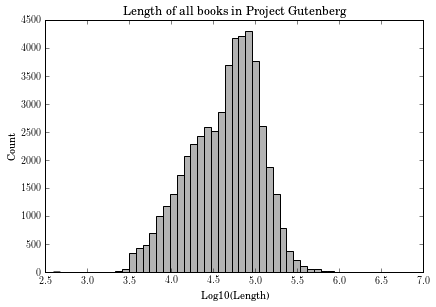

In [26]:
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([.2,.2,.7,.7])
a = ax.hist(np.log10(sorted_lengths),bins=50,color=".7")
ax.set_xlabel("Log10(Length)")
ax.set_ylabel("Count")
ax.set_title("Length of all books in Project Gutenberg")


mysavefig('length-all-log.pdf',date=True,folder="media/figures/gutenberg-details",openfig=False)

## Book length with just the top downloaded

In [27]:
all_lengths_popular = [b.length for b in Book.objects.filter(exclude=False,length__gt=0,downloads__gte=100)]
print(len(all_lengths_popular))

3488


In [28]:
sorted_lengths_pop = sorted(all_lengths_popular,reverse=False)

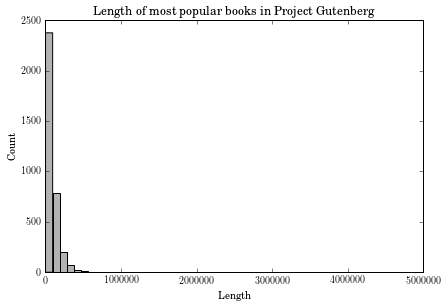

In [29]:
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([.2,.2,.7,.7])
a = ax.hist(sorted_lengths_pop,bins=50,color=".7")
ax.set_xlabel("Length")
ax.set_ylabel("Count")
ax.set_title("Length of most popular books in Project Gutenberg")


mysavefig('length-top.pdf',date=True,folder="media/figures/gutenberg-details",openfig=False)

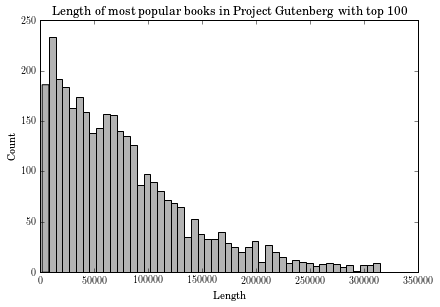

In [30]:
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([.2,.2,.7,.7])
a = ax.hist(sorted_lengths_pop[:-100],bins=50,color=".7")
ax.set_xlabel("Length")
ax.set_ylabel("Count")
ax.set_title("Length of most popular books in Project Gutenberg with top 100")


mysavefig('length-top-without-top100.pdf',date=True,folder="media/figures/gutenberg-details",openfig=False)

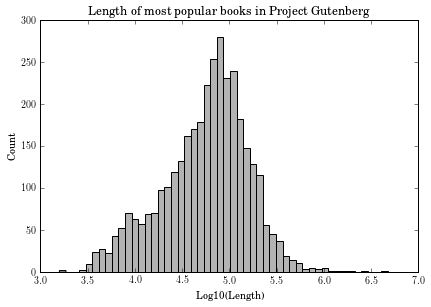

In [31]:
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([.2,.2,.7,.7])
a = ax.hist(np.log10(sorted_lengths_pop),bins=50,color=".7")
ax.set_xlabel("Log10(Length)")
ax.set_ylabel("Count")
ax.set_title("Length of most popular books in Project Gutenberg")


mysavefig('length-top-without-top100-log.pdf',date=True,folder="media/figures/gutenberg-details",openfig=False)

In [32]:
q = Book.objects.filter(exclude=False,length__gt=0,downloads__gte=100).order_by("length")

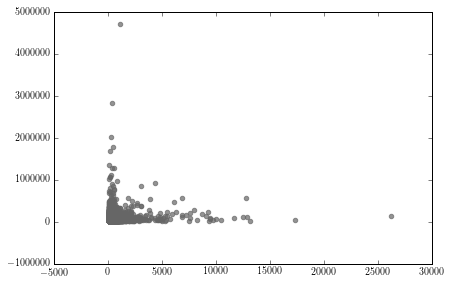

In [33]:
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([.2,.2,.7,.7])
a = ax.scatter([b.downloads for b in q],[b.length for b in q],color="0.4",alpha=0.7)

mysavefig('downloads-length-scatter.pdf',date=True,folder="media/figures/gutenberg-details",openfig=False)

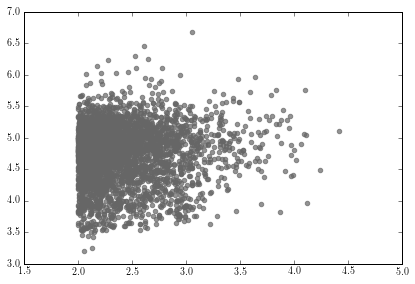

In [34]:
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([.2,.2,.7,.7])
a = ax.scatter(np.log10([b.downloads for b in q]),np.log10([b.length for b in q]),color="0.4",alpha=0.7)

mysavefig('downloads-length-scatter-loglog.pdf',date=True,folder="media/figures/gutenberg-details",openfig=False)

what are the shortest ones?

In [35]:
for b in q[:20]:
    print(b.downloads,b.length,b.title,)

113 1589 Lincoln's Gettysburg Address
Given November 19, 1863 on the battlefield near Gettysburg, Pennsylvania, USA
135 1781 The United States Bill of Rights
The Ten Original Amendments to the Constitution of the United States
139 2635 Moby Word Lists
123 2772 Moby Thesaurus List
109 2852 Hans Huckebein
132 3172 Night of the Living Dead
141 3199 The Project Gutenberg Works of Plato
An Index
168 3368 Красавице, которая нюхала табак
181 3383 A Apple Pie
107 3400 The Story of a Fierce Bad Rabbit
109 3423 The Works Of Mark Twain
An Index of all Project Gutenberg Editions
374 3426 The Tenniel Illustrations for Carroll's Alice in Wonderland
144 3436 The Story of Miss Moppet
112 3454 Cyclopedia of Economics
106 3529 Walter Crane's Painting Book
Containing twelve coloured and twelve outline full-page plates
172 3574 Call of the Wild
117 3638 Beyond Good and Evil
121 3647 The Absurd ABC
117 3661 Dolly and Molly and the Farmer Man
436 3680 Alice's Adventures in Wonderland


what are the longest ones?

In [36]:
for b in q.order_by("-length")[:20]:
    print(b.downloads,b.length,b.title,)

1132 4711110 Webster's Unabridged Dictionary
407 2824845 The Entire Project Gutenberg Works of Mark Twain
335 2002488 Novo dicionário da língua portuguesa
446 1784814 The 2010 CIA World Factbook
188 1681893 Project Gutenberg Complete Works of Winston Churchill
150 1349219 The Project Gutenberg Encyclopedia
Volume 1 of 28
347 1283916 The Diary of Samuel Pepys — Complete
605 1263333 The Memoirs of Jacques Casanova de Seingalt, 1725-1798. Complete
288 1107913 The Bible, Douay-Rheims, Complete
163 1066108 The Bible, Douay-Rheims, Complete
The Challoner Revision
227 1049435 The Grammar of English Grammars
118 1007474 Meyers Konversationslexikon Band 15
874 968957 The Spectator, Volumes 1, 2 and 3
With Translations and Index for the Series
4394 905503 The Complete Works of William Shakespeare
417 886656 The Bible, King James Version, Complete
3037 855359 The King James Version of the Bible
477 852784 The Complete Poetic and Dramatic Works of Robert Browning
Cambridge Edition
163 801941 The N

In [37]:
# least popular (this is pretty random sample, I'd think)
for b in q.order_by("downloads")[:20]:
    print(b.downloads,b.length,b.title,)

100 15766 The Number "e"
100 41750 The Red One
100 211065 Four Short Stories By Emile Zola
100 22235 Cinderella; Or, The Little Glass Slipper, and Other Stories
100 70445 The Adventures of Gerard
100 105247 1492
100 30736 The Devil's Disciple
100 66466 Appreciations, with an Essay on Style
100 220598 The Old Wives' Tale
100 50159 Every Man in His Humor
100 33065 Icelandic Primer with Grammar, Notes and Glossary
100 85455 Elsie Dinsmore
100 44482 The Non-Christian Cross
An Enquiry into the Origin and History of the Symbol Eventually Adopted as That of Our Religion
100 107174 The World's Greatest Books — Volume 05 — Fiction
100 63139 Poems
Household Edition
100 129323 The Teeth of the Tiger
100 288131 Studies in the Psychology of Sex, Volume 6
Sex in Relation to Society
100 307334 Forty-one years in India
From Subaltern To Commander-In-Chief
100 4043 A Journey to the Center of the Earth
100 91828 The Pirates' Who's Who
Giving Particulars Of The Lives and Deaths Of The Pirates And Buccane

In [38]:
# most popular
for b in q.order_by("-downloads")[:20]:
    print(b.downloads,b.length,b.title,)

26184 125058 Pride and Prejudice
17366 30854 Alice's Adventures in Wonderland
13191 9256 The Yellow Wallpaper
12911 108249 The Adventures of Sherlock Holmes
12764 568612 War and Peace
12517 115454 Adventures of Huckleberry Finn
11699 78261 Frankenstein; Or, The Modern Prometheus
10442 44138 Narrative of the Life of Frederick Douglass, an American Slave
9989 62370 The Kama Sutra of Vatsyayana
Translated From the Sanscrit in Seven Parts With Preface, Introduction and Concluding Remarks
9774 25296 Metamorphosis
9454 74855 The Adventures of Tom Sawyer
9423 52799 The Prince
9373 24095 The Importance of Being Earnest: A Trivial Comedy for Serious People
9240 217059 Moby Dick; Or, The Whale
9072 139744 A Tale of Two Cities
8711 188628 Great Expectations
8213 29884 A Doll's House : a play
7946 271072 Ulysses
7652 82304 The Picture of Dorian Gray
7642 192551 The Romance of Lust: A Classic Victorian erotic novel


### The longest ones and least downloaded ones were troublesome.

Another rough cut will be to take length < 200000 words, and downloads > 150.

In [39]:
q = Book.objects.filter(exclude=False,length__gt=10000,length__lte=200000,downloads__gte=150).order_by("length")
len(q)

1922

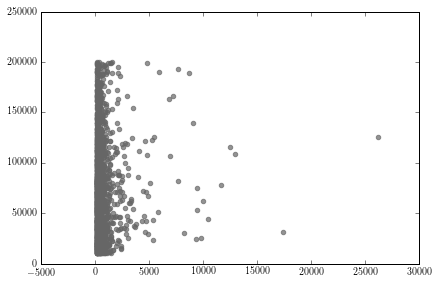

In [40]:
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([.2,.2,.7,.7])
a = ax.scatter([b.downloads for b in q],[b.length for b in q],color="0.4",alpha=0.7)

mysavefig('downloads-length-scatter-subset.pdf',date=True,folder="media/figures/gutenberg-details",openfig=False)

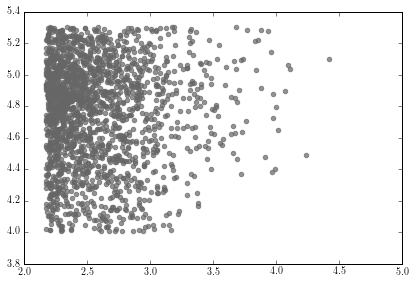

In [42]:
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([.2,.2,.7,.7])
a = ax.scatter(np.log10([b.downloads for b in q]),np.log10([b.length for b in q]),color="0.4",alpha=0.7)

mysavefig('downloads-length-scatter-subset-loglog.pdf',date=True,folder="media/figures/gutenberg-details",openfig=False)

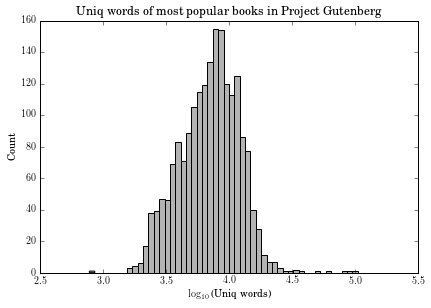

In [43]:
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([.2,.2,.7,.7])
q = Book.objects.filter(exclude=False,length__gt=10000,length__lte=200000,downloads__gte=150).order_by("numUniqWords")
a = ax.hist(np.log10([b.numUniqWords for b in q]),bins=50,color=".7")
ax.set_xlabel(r"$\log_{10}\,$(Uniq words)")
ax.set_ylabel("Count")
ax.set_title("Uniq words of most popular books in Project Gutenberg")

mysavefig('unique-words-log.pdf',date=True,folder="media/figures/gutenberg-details",openfig=False)

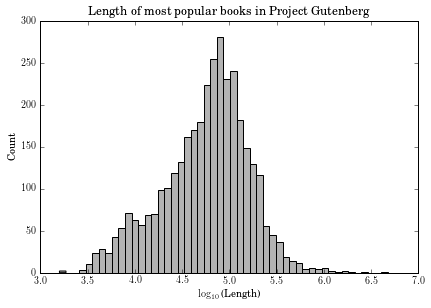

In [44]:
fig = plt.figure(figsize=(7.5,5))
ax = fig.add_axes([.2,.2,.7,.7])
a = ax.hist(np.log10(sorted_lengths_pop),bins=50,color=".7")
ax.set_xlabel(r"$\log_{10}\,$(Length)")
ax.set_ylabel("Count")
ax.set_title("Length of most popular books in Project Gutenberg")

mysavefig('length-top-log.pdf',date=True,folder="media/figures/gutenberg-details",openfig=False)

In [45]:
# shortest
for b in q[:20]:
    print(b.downloads,b.length,b.title,)

196 128285 The Square Root of 4 to a Million Places
1697 13673 The History Of The Decline And Fall Of The Roman Empire
Table of Contents with links in the HTML file to the two
Project Gutenberg editions (12 volumes)
307 11143 A Primary Reader: Old-time Stories, Fairy Tales and Myths Retold by Children
169 13841 Of the Just Shaping of Letters
409 14613 Book of Mormon Stories
Adapted to the Capacity of Young Children
227 11348 The Ballad of Reading Gaol
197 10883 My Father's Dragon
452 10788 McGuffey's First Eclectic Reader, Revised Edition
881 12367 Euthyphro
289 17614 The Categories
395 10507 Piper in the Woods
150 10484 Parables of the Cross
524 10223 The Madman: His Parables and Poems
183 11844 Adventures of Huckleberry Finn, Chapters 01 to 05
408 10137 Uncle Remus and Brer Rabbit
349 19941 Pennsylvania Dutch Cooking
363 10546 The Crystal Crypt
198 10432 Orphans of the Void
393 11064 The Skull
177 19628 The Adventures of Buster Bear


In [46]:
# longest
for b in q.order_by("-length")[:20]:
    print(b.downloads,b.length,b.title,)

161 199808 Modern Painters, Volume 1 (of 5)
1566 199800 The Moonstone
387 199598 The American Occupation of the Philippines 1898-1912
220 199343 La Comédie humaine - Volume 01
1503 199178 Swann's Way
4795 198855 The Iliad
1196 198822 The Innocents Abroad
156 198587 The Best Short Stories of 1917, and the Yearbook of the American Short Story
1348 198569 A Concise Dictionary of Middle English from A.D. 1150 to 1580
306 198245 The Federalist Papers
666 198071 Villette
173 198018 The Financier: A Novel
168 197942 The Sexual Question
A Scientific, psychological, hygienic and sociological study
244 197844 Rob Roy — Complete
304 196973 The Red and the Black
A Chronicle of 1830
160 196818 The Works of Lord Byron. Vol. 6
711 196803 The Mysterious Island
923 196656 Ivanhoe: A Romance
235 196038 The Sonnets, Triumphs, and Other Poems of Petrarch
786 195662 The Federalist Papers


In [47]:
# least popular
for b in q.order_by("downloads")[:20]:
    print(b.downloads,b.length,b.title,)

150 23088 Julius Caesar
150 50879 Heartbreak House
150 45107 Tom Swift and His Motor-Cycle; Or, Fun and Adventures on the Road
150 120758 The Age of Chivalry
150 99344 The Extermination of the American Bison
150 10484 Parables of the Cross
150 25585 Brennendes Geheimnis: Erzählung
150 55310 Dante's Hel
In proza overgebracht en met een inleiding voorzien
150 15049 The Flying Dutchman (Der Fliegende Hollaender): Romantic Opera in Three Acts
150 21135 Selections from Ancient Irish Poetry
151 79378 The Golden Road
151 103629 The Further Adventures of Robinson Crusoe
151 85607 When the Sleeper Wakes
151 147404 The Uncommercial Traveller
151 87471 The Natural History of Selborne
151 102804 Pagan and Christian Creeds: Their Origin and Meaning
151 83923 Piccadilly Jim
151 137535 Lincoln's Yarns and Stories
A Complete Collection of the Funny and Witty Anecdotes That Made Lincoln Famous as America's Greatest Story Teller
151 20291 North of Boston
151 122901 The Sea-Hawk


In [48]:
# most popular
for b in q.order_by("-downloads")[:20]:
    print(b.downloads,b.length,b.title,)

26184 125058 Pride and Prejudice
17366 30854 Alice's Adventures in Wonderland
12911 108249 The Adventures of Sherlock Holmes
12517 115454 Adventures of Huckleberry Finn
11699 78261 Frankenstein; Or, The Modern Prometheus
10442 44138 Narrative of the Life of Frederick Douglass, an American Slave
9989 62370 The Kama Sutra of Vatsyayana
Translated From the Sanscrit in Seven Parts With Preface, Introduction and Concluding Remarks
9774 25296 Metamorphosis
9454 74855 The Adventures of Tom Sawyer
9423 52799 The Prince
9373 24095 The Importance of Being Earnest: A Trivial Comedy for Serious People
9072 139744 A Tale of Two Cities
8711 188628 Great Expectations
8213 29884 A Doll's House : a play
7652 82304 The Picture of Dorian Gray
7642 192551 The Romance of Lust: A Classic Victorian erotic novel
7220 165910 Dracula
6904 106591 Grimms' Fairy Tales
6846 163638 Emma
5904 190479 Jane Eyre: An Autobiography


In [49]:
q = Book.objects.filter(exclude=False,length__gt=10000,length__lte=200000,downloads__gte=150).order_by("numUniqWords")
print("="*40)
print("least uniq words")
for b in q[:20]:
    print(b.numUniqWords,b.length,b.title)
q = Book.objects.filter(exclude=False,length__gt=10000,length__lte=200000,downloads__gte=150).order_by("-numUniqWords")
print("="*40)
print("most uniq words")
for b in q[:20]:
    print(b.numUniqWords,b.length,b.title)

least uniq words
774 128285 The Square Root of 4 to a Million Places
1591 13673 The History Of The Decline And Fall Of The Roman Empire
Table of Contents with links in the HTML file to the two
Project Gutenberg editions (12 volumes)
1641 11143 A Primary Reader: Old-time Stories, Fairy Tales and Myths Retold by Children
1673 13841 Of the Just Shaping of Letters
1791 14613 Book of Mormon Stories
Adapted to the Capacity of Young Children
1807 11348 The Ballad of Reading Gaol
1858 10883 My Father's Dragon
1862 10788 McGuffey's First Eclectic Reader, Revised Edition
1953 12367 Euthyphro
1986 17614 The Categories
2011 10507 Piper in the Woods
2042 10484 Parables of the Cross
2060 10223 The Madman: His Parables and Poems
2062 11844 Adventures of Huckleberry Finn, Chapters 01 to 05
2082 10137 Uncle Remus and Brer Rabbit
2090 19941 Pennsylvania Dutch Cooking
2100 10546 The Crystal Crypt
2100 10432 Orphans of the Void
2144 11064 The Skull
2191 19628 The Adventures of Buster Bear
most uniq words


## Now let's go take that final selection and make sure that we have the timeseries

In [50]:
q = Book.objects.filter(exclude=False,length__gt=10000,length__lte=200000,downloads__gte=150,numUniqWords__gt=1000,numUniqWords__lt=18000,lang_code_id=0).order_by("-numUniqWords")
print(len(q))
print("="*40)
print("most uniq words")
for b in q[:20]:
    print(b.numUniqWords,b.length,b.title)

1755
most uniq words
17935 162022 Nooks and Corners of Lancashire and Cheshire.
A Wayfarer's Notes in the Palatine Counties, Historical,
Legendary, Genealogical, and Descriptive.
17933 198071 Villette
17921 102680 The Theological Tractates and The Consolation of Philosophy
17851 193496 Following the Equator: A Journey Around the World
17849 167354 The Oxford Book of American Essays
17747 123518 The Witch-cult in Western Europe: A Study in Anthropology
17638 196038 The Sonnets, Triumphs, and Other Poems of Petrarch
17621 149380 The Poetical Works of John Milton
17551 110633 Latin for Beginners
17546 131939 Poems and Songs of Robert Burns
17451 161317 An Introduction to Entomology: Vol. I (of 4)
or Elements of the Natural History of the Insects
17407 167227 Proceedings of the New York Historical Association [1906]
17217 178540 The Book of the Thousand Nights and a Night — Volume 01
16926 197844 Rob Roy — Complete
16868 198822 The Innocents Abroad
16803 159031 Autobiography of a Yogi
1680

In [51]:
b = q[0]
b_data = Book_raw_data(b)

In [52]:
b.gutenberg_id

51191

In [53]:
# b_data.timeseries

In [54]:
b_data.save()

In [55]:
a = b_data.chopper_sliding(my_LabMT,num_points=200,stop_val=1.0)

In [56]:
%time a = b_data.chopper_sliding(my_LabMT,num_points=200,stop_val=2.0)

CPU times: user 36.1 ms, sys: 9 ms, total: 45.2 ms
Wall time: 44.8 ms


In [57]:
# for i,b in enumerate(q):
#     print(i)
#     print(b.title)
#     b_data = Book_raw_data(b)
#     for stop_val in [0.0,0.5,1.0,1.5,2.0]:
#         a = b_data.chopper_sliding(my_LabMT,num_points=200,stop_val=stop_val)
#     a = b_data.chopper_sliding(my_LabMT,num_points=200,stop_val=1.0)
#     b_data.save()

/Users/andyreagan/projects/2014/09-books/pyvenv/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10


/Users/andyreagan/projects/2014/09-books/pyvenv/lib/python3.5/site-packages/ipykernel/__main__.py:26: RuntimeWarning: divide by zero encountered in log10




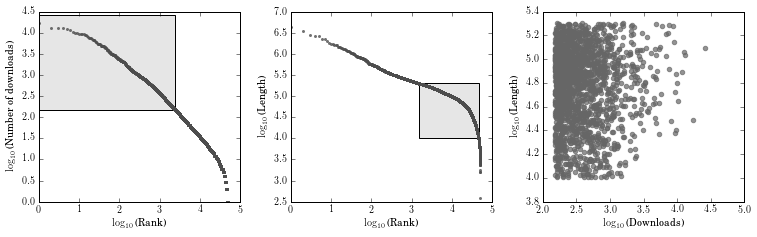

In [102]:
l_min = 10000
l_max = 200000
d_min=150

fig = plt.figure(figsize=(10,3.3))
ax1 = fig.add_axes([.04,.05,.28,.8])
a = ax1.plot(np.log10(range(len(sorted_downloads))),np.log10(sorted_downloads),".",markerfacecolor=".3",markeredgewidth=0.0,alpha=0.8,zorder=1)
ax1.set_xlabel(r"$\log_{10}\, $(Rank)")
ax1.set_ylabel(r"$\log_{10}\, $(Number of downloads)")
ax1.add_patch(
    patches.Rectangle(
        (np.log10(1.), np.log10(d_min)),   # (x,y)
        np.log10(sorted_downloads.index(d_min))-np.log10(1.),          # width
        np.log10(sorted_downloads[0])-np.log10(d_min),          # height
        facecolor=".9",
        zorder=1,
    )
)
# ax.set_title("Log-Log Rank-Downloads for books in Project Gutenberg")
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

sorted_lengths_fl = np.flipud(np.array(sorted_lengths))
ax2 = fig.add_axes([.39,.05,.28,.8])
a = ax2.plot(np.log10(range(len(sorted_lengths))),np.log10(sorted_lengths_fl),".",markerfacecolor=".3",markeredgewidth=0.0,alpha=0.8)
# ax2.
ax2.set_xlabel(r"$\log_{10}\, $(Rank)")
ax2.set_ylabel(r"$\log_{10}\, $(Length)")
ax2.add_patch(
    patches.Rectangle(
        (np.log10(find_nearest(sorted_lengths_fl,l_min)), np.log10(l_min)),   # (x,y)
        np.log10(find_nearest(sorted_lengths_fl,l_max))-np.log10(find_nearest(sorted_lengths_fl,l_min)),          # width
        np.log10(l_max)-np.log10(l_min),          # height
        facecolor=".9",
        zorder=1,
    )
)
# ax2.set_title("Log-Log Rank-Length for books in Project Gutenberg")

q = Book.objects.filter(exclude=False,length__gt=l_min,length__lte=l_max,downloads__gte=d_min,numUniqWords__gt=1000,numUniqWords__lt=18000,lang_code_id=0)
ax3 = fig.add_axes([.74,.05,.28,.8])
a = ax3.scatter(np.log10([b.downloads for b in q]),np.log10([b.length for b in q]),color="0.4",alpha=0.7)
ax3.set_xlabel(r"$\displaystyle \log_{10}\, $(Downloads)")
ax3.set_ylabel(r"$\displaystyle \log_{10}\, $(Length)")

mysavefig('final-distributions.pdf',date=True,folder="media/figures/gutenberg-details",openfig=True)

In [95]:
find_nearest(sorted_lengths,l_min)

48364

In [94]:
np.log10(find_nearest(sorted_lengths,l_min))

3.6526330680831101